In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import tensorly as tl
from lib.jpeg import *
from lib.tools import *
from lib.regression import *
from lib.sketchml import *

In [2]:
tensor_shape = (3, 128,128)
tensor_size  = 128*128*3
rank = 4

In [3]:
# CP decomposition: Creating factor matrices for the tensor
factor_1 = torch.randn(tensor_shape[0], rank)
factor_2 = torch.randn(tensor_shape[1], rank)
factor_3 = torch.randn(tensor_shape[2], rank)

In [4]:
factor_1.shape

torch.Size([3, 4])

In [5]:
tensor = torch.einsum('ir,jr,kr->ijk', factor_1, factor_2, factor_3)

In [6]:
minmaxsketch,bucket_means, keys, compressed_size = compressor_sketchml(tensor,128,0.3,3)

In [13]:
reconstruct_tensor = decompressor_sketchml(tensor.shape, minmaxsketch,bucket_means, keys)

In [14]:
calculate_snr(tensor_size,tensor.numpy(),reconstruct_tensor.numpy())

3.2174646854400635

In [16]:
calculate_mse(tensor.numpy(),reconstruct_tensor.numpy())

0.87864304

In [14]:
# # Normalize tensor values to the range [0, 128]
# tensor = tensor - tensor.min()  # Shift values to be non-negative
# tensor = tensor / tensor.max()  # Scale to [0, 1]
# tensor = tensor * 127  # Scale to [0, 128]
# # Convert to integers and clip to ensure values are within [0, 128]
# tensor = tensor.round().clamp(0, 128).to(torch.int)

In [27]:
torch.linalg.matrix_rank(tensor)

tensor([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4])

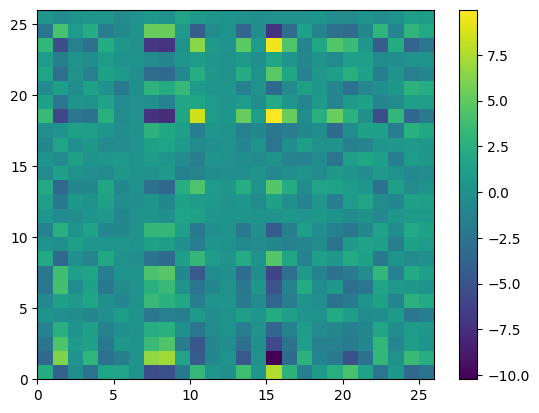

In [28]:
plt.figure()
plt.pcolormesh(tensor[0])
plt.colorbar()